# Reconstructing an RTRBM

In [1]:
import torch
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [2]:
generated = torch.load(open(r"D:\OneDrive\RU\Intern\rtrbm_master\results\Reproduce_rtrbm\rtrbm_original_list_batchsize2500epoch", "rb"))
trained = torch.load(open(r"D:\OneDrive\RU\Intern\rtrbm_master\results\Reproduce_rtrbm\rtrbm_list_batchsize2500epoch", "rb"))

In [3]:
N_H = 3
W_generated = torch.zeros(3, 3, 20)
U_generated= torch.zeros(3, 3, 3)
W_trained = torch.zeros(3, 3, 20)
U_trained = torch.zeros(3, 3, 3)
pearson_W = torch.zeros(len(generated))
pearson_U = torch.zeros(len(generated))

for bm in range(len(generated[0])):
    # get weights
    W_generated[bm, :, :] = generated[0][bm].W.detach().clone()
    U_generated[bm, :, :] = generated[0][bm].W_acc.detach().clone()
    W_trained[bm, :, :] = trained[0][bm].VH.detach().clone()
    U_trained[bm, :, :] = trained[0][bm].HH.detach().clone()

    # calculate correlation and reshuffle weights
    corr = np.zeros((N_H, N_H))
    shuffle_idx = np.zeros((N_H))
    for i in range(N_H):
        for j in range(N_H):
            corr[i, j] = np.correlate(W_generated[bm, i,:], W_trained[bm, j,:])
        shuffle_idx[i] = np.argmax(corr[i,:])

    W_trained[bm, :, :] = W_trained[bm, shuffle_idx, :]
    U_trained[bm, :, :] = U_trained[bm, shuffle_idx, :]
    U_trained[bm, :, :] = U_trained[bm, :, shuffle_idx]

    pearson_W[bm] = pearsonr(W_trained[bm, :, :].ravel(), W_generated[bm, :, :].ravel())[0]
    pearson_U[bm] = pearsonr(U_trained[bm, :, :].ravel(), U_generated[bm, :, :].ravel())[0]


In [4]:
pearson_U = torch.zeros(3)
pearson_W = torch.zeros(3)

for w in range(3):
    pearson_W[w] = pearsonr(W_trained[w, :, :].ravel(), W_generated[w, :, :].ravel())[0]
    pearson_U[w] = pearsonr(U_trained[w, :, :].ravel(), U_generated[w, :, :].ravel())[0]

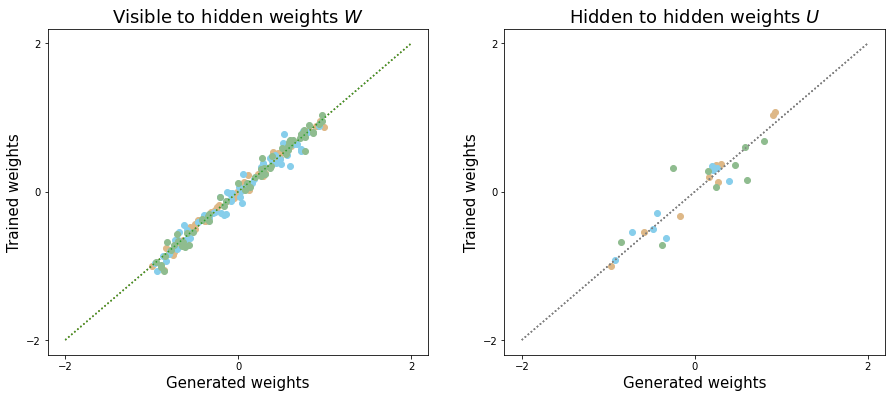

In [12]:
color_list = ["burlywood", "skyblue", "darkseagreen"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for w in range(3):
    axes[0].plot(W_generated[w, :, :].ravel(), W_trained[w, :, :].ravel(), 'o', color=color_list[w])
    axes[0].plot([-2, 2],[-2, 2], ':')
    axes[0].set_xticks([-2, 0, 2])
    axes[0].set_yticks([-2, 0, 2])
    axes[0].set_xlabel('Generated weights', fontsize=15)
    axes[0].set_ylabel('Trained weights', fontsize=15)
    axes[0].set_title('Visible to hidden weights $W$'.format(pearson_W), fontsize=18)

    axes[1].plot(U_generated[w, :, :].ravel(), U_trained[w, :, :].ravel(), 'o', color=color_list[w])
    axes[1].plot([-2, 2], [-2, 2], ':', color="grey")
    axes[1].set_xticks([-2, 0, 2])
    axes[1].set_yticks([-2, 0, 2])
    axes[1].set_xlabel('Generated weights', fontsize=15)
    axes[1].set_ylabel('Trained weights', fontsize=15)
    axes[1].set_title('Hidden to hidden weights $U$'.format(pearson_U), fontsize=18)

plt.savefig(r'D:\OneDrive\RU\Intern\rtrbm_master\figures\moments_weights', dpi=500)

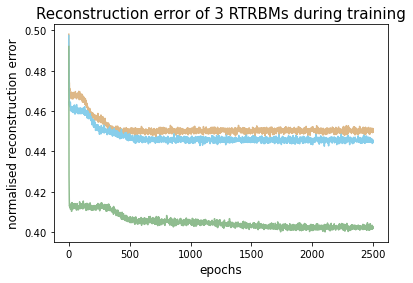

In [13]:


for i in range(3):
    plt.plot(trained[0][i].errors, color=color_list[i])

plt.title('Reconstruction error of 3 RTRBMs during training', fontsize=15)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('normalised reconstruction error', fontsize=12)
plt.savefig(r'D:\OneDrive\RU\Intern\rtrbm_master\figures\rec_error', dpi=500)

In [14]:
print(pearson_W)

tensor([0.9949, 0.9834, 0.9924])


In [15]:
print(pearson_U)

tensor([0.9906, 0.9359, 0.8343])
